In [1]:

import os
import zipfile
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np
def load_dataset(zip_file_path):
    # Extract ZIP file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall('dataset')
    # Load images and labels
    images_dir = 'dataset/Brain_Tumor_Dataset'
    images = []
    labels = []
    for dir_name in os.listdir(images_dir):
        dir_path = os.path.join(images_dir, dir_name)
        if os.path.isdir(dir_path):
            for file_name in os.listdir(dir_path):
                img_path = os.path.join(dir_path, file_name)
                img = load_img(img_path, color_mode='grayscale', target_size=(28, 28))
                img_array = img_to_array(img)
                images.append(img_array)
                if dir_name == 'Positive':
                    labels.append(1)
                else:
                    labels.append(0)
 # Convert to numpy arrays and reshape
    images = np.array(images).reshape((-1, 28, 28, 1))
    labels = np.array(labels)
    # One-hot encode labels
    labels = to_categorical(labels)
    # Split dataset into training and testing sets (e.g., 80% train, 20% test)
    trainX, testX, trainY, testY = train_test_split(images, labels, test_size=0.2, random_state=42)
    return trainX, trainY, testX, testY
# Example usage:
zip_file_path = r"C:\Users\91817\Downloads\archive (15).zip"
trainX, trainY, testX, testY = load_dataset(zip_file_path)


In [4]:
#CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
# Example usage:
zip_file_path = r"C:\Users\91817\Downloads\archive (15).zip"
trainX, trainY, testX, testY = load_dataset(zip_file_path)
model = create_model()
model.summary()
model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY))
loss, accuracy = model.evaluate(testX, testY)
print(f'Test accuracy: {accuracy:.2f}')



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)            

33/33 [==============================] - 0s 6ms/step - loss: 0.2047 - accuracy: 0.9725
Test accuracy: 0.97
33/33 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       417
           1       0.97      0.99      0.98       637

    accuracy                           0.97      1054
   macro avg       0.97      0.97      0.97      1054
weighted avg       0.97      0.97      0.97      1054

Epoch 1/10
132/132 [==============================] - 2s 14ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.2220 - val_accuracy: 0.9753
Epoch 2/10
132/132 [==============================] - 2s 13ms/step - loss: 0.0021 - accuracy: 0.9998 - val_loss: 0.2233 - val_accuracy: 0.9734
Epoch 3/10
132/132 [==============================] - 2s 13ms/step - loss: 8.3098e-04 - accuracy: 1.0000 - val_loss: 0.2578 - val_accuracy: 0.9744
Epoch 4/10
132/132 [==============================] - 2s 13ms/step - loss: 5.114

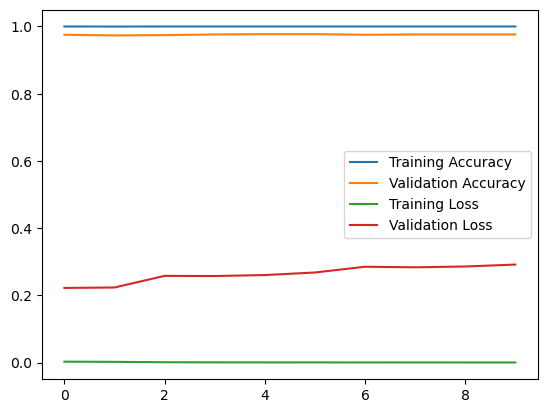

33/33 [==============================] - 0s 6ms/step


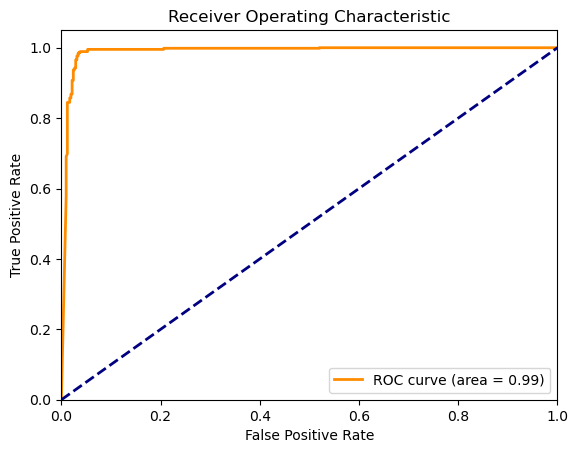

In [5]:
# Evaluate the model
loss, accuracy = model.evaluate(testX, testY)
print(f'Test accuracy: {accuracy:.2f}')
# Classification report
from sklearn.metrics import classification_report, roc_curve, auc
y_pred = model.predict(testX)
y_pred_class = np.argmax(y_pred, axis=1)
y_test_class = np.argmax(testY, axis=1)
print(classification_report(y_test_class, y_pred_class))
# Accuracy vs Loss curves
import matplotlib.pyplot as plt
history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()
# ROC curve
y_pred_proba = model.predict(testX)[:, 1]
fpr, tpr, _ = roc_curve(testY[:, 1], y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [6]:
#RESNET 50
from tensorflow.keras.layers import Input, ZeroPadding2D
from tensorflow.keras.applications import ResNet50
def resnet50_model():
    input_shape = (28, 28, 1)
    input_x = Input(shape=input_shape)
    x = ZeroPadding2D(padding=(2, 2))(input_x)  # Add padding to increase input size
    base_model = ResNet50(weights=None, include_top=False, input_tensor=x)
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
# Example usage:
zip_file_path = r"C:\Users\91817\Downloads\archive (15).zip"
trainX, trainY, testX, testY = load_dataset(zip_file_path)
model = create_model()
model.summary()
model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY))
loss, accuracy = model.evaluate(testX, testY)
print(f'Test accuracy: {accuracy:.2f}')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

33/33 [==============================] - 0s 6ms/step - loss: 0.1587 - accuracy: 0.9687
Test accuracy: 0.97
33/33 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       417
           1       0.98      0.97      0.97       637

    accuracy                           0.97      1054
   macro avg       0.97      0.97      0.97      1054
weighted avg       0.97      0.97      0.97      1054

Epoch 1/10
132/132 [==============================] - 2s 13ms/step - loss: 0.0097 - accuracy: 0.9972 - val_loss: 0.1926 - val_accuracy: 0.9706
Epoch 2/10
132/132 [==============================] - 2s 13ms/step - loss: 0.0117 - accuracy: 0.9960 - val_loss: 0.1779 - val_accuracy: 0.9734
Epoch 3/10
132/132 [==============================] - 2s 13ms/step - loss: 0.0066 - accuracy: 0.9983 - val_loss: 0.2045 - val_accuracy: 0.9734
Epoch 4/10
132/132 [==============================] - 2s 13ms/step - loss: 5.9983e-0

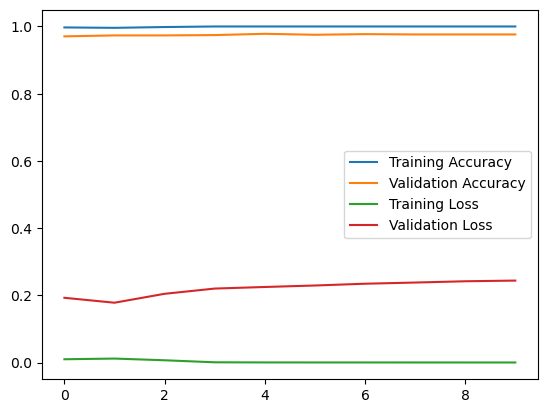

33/33 [==============================] - 0s 6ms/step


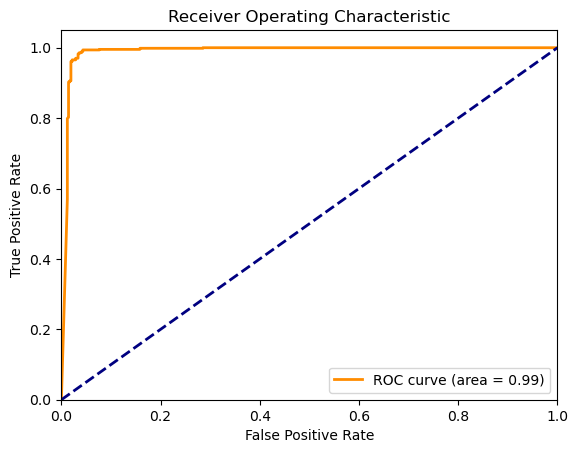

In [7]:
# Evaluate the model
loss, accuracy = model.evaluate(testX, testY)
print(f'Test accuracy: {accuracy:.2f}')
# Classification report
from sklearn.metrics import classification_report, roc_curve, auc
y_pred = model.predict(testX)
y_pred_class = np.argmax(y_pred, axis=1)
y_test_class = np.argmax(testY, axis=1)
print(classification_report(y_test_class, y_pred_class))
# Accuracy vs Loss curves
import matplotlib.pyplot as plt
history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()
# ROC curve
y_pred_proba = model.predict(testX)[:, 1]
fpr, tpr, _ = roc_curve(testY[:, 1], y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [8]:
#VGG-16
from tensorflow.keras.layers import Input, ZeroPadding2D
from tensorflow.keras.applications import vgg16
def vgg16_model():
    input_shape = (28, 28, 1)
    input_x = Input(shape=input_shape)
    x = ZeroPadding2D(padding=(2, 2))(input_x)  # Add padding to increase input size
    base_model = ResNet50(weights=None, include_top=False, input_tensor=x)
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
# Example usage:
zip_file_path = r"C:\Users\91817\Downloads\archive (15).zip"
trainX, trainY, testX, testY = load_dataset(zip_file_path)
model = create_model()
model.summary()
model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY))
loss, accuracy = model.evaluate(testX, testY)
print(f'Test accuracy: {accuracy:.2f}')


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

33/33 [==============================] - 0s 6ms/step - loss: 0.2059 - accuracy: 0.9649
Test accuracy: 0.96
33/33 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       417
           1       0.96      0.98      0.97       637

    accuracy                           0.96      1054
   macro avg       0.97      0.96      0.96      1054
weighted avg       0.97      0.96      0.96      1054

Epoch 1/10
132/132 [==============================] - 2s 13ms/step - loss: 0.0240 - accuracy: 0.9919 - val_loss: 0.1888 - val_accuracy: 0.9725
Epoch 2/10
132/132 [==============================] - 2s 13ms/step - loss: 0.0072 - accuracy: 0.9981 - val_loss: 0.2167 - val_accuracy: 0.9791
Epoch 3/10
132/132 [==============================] - 2s 13ms/step - loss: 0.0037 - accuracy: 0.9986 - val_loss: 0.2312 - val_accuracy: 0.9744
Epoch 4/10
132/132 [==============================] - 2s 13ms/step - loss: 6.2347e-0

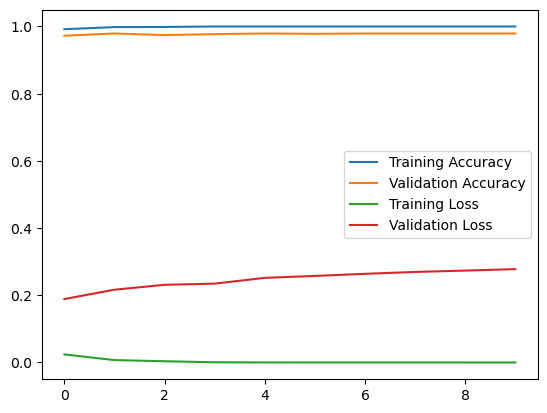

33/33 [==============================] - 0s 6ms/step


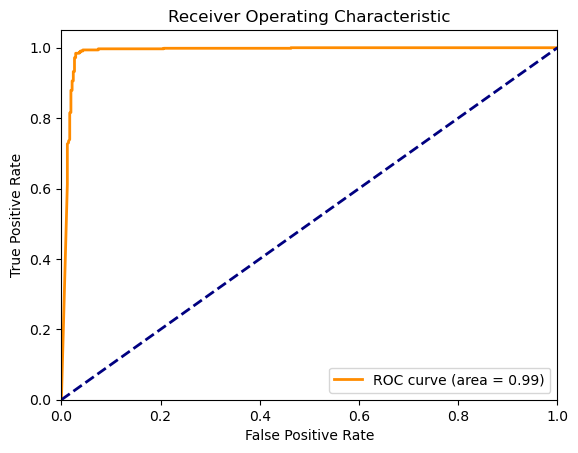

In [9]:
# Evaluate the model
loss, accuracy = model.evaluate(testX, testY)
print(f'Test accuracy: {accuracy:.2f}')
# Classification report
from sklearn.metrics import classification_report, roc_curve, auc
y_pred = model.predict(testX)
y_pred_class = np.argmax(y_pred, axis=1)
y_test_class = np.argmax(testY, axis=1)
print(classification_report(y_test_class, y_pred_class))
# Accuracy vs Loss curves
import matplotlib.pyplot as plt
history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()
# ROC curve
y_pred_proba = model.predict(testX)[:, 1]
fpr, tpr, _ = roc_curve(testY[:, 1], y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [10]:
#MOBILENET
from tensorflow.keras.layers import Input, ZeroPadding2D
from tensorflow.keras.applications import MobileNet
def mobilenet_model():
    input_shape = (28, 28, 1)
    input_x = Input(shape=input_shape)
    x = ZeroPadding2D(padding=(2, 2))(input_x)  # Add padding to increase input size
    base_model = ResNet50(weights=None, include_top=False, input_tensor=x)
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
# Example usage:
zip_file_path = r"C:\Users\91817\Downloads\archive (15).zip"
trainX, trainY, testX, testY = load_dataset(zip_file_path)
model = create_model()
model.summary()
model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY))
loss, accuracy = model.evaluate(testX, testY)
print(f'Test accuracy: {accuracy:.2f}')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 576)              

33/33 [==============================] - 0s 6ms/step - loss: 0.2543 - accuracy: 0.9507
Test accuracy: 0.95
33/33 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       417
           1       0.94      0.98      0.96       637

    accuracy                           0.95      1054
   macro avg       0.95      0.94      0.95      1054
weighted avg       0.95      0.95      0.95      1054

Epoch 1/10
132/132 [==============================] - 2s 14ms/step - loss: 0.0182 - accuracy: 0.9936 - val_loss: 0.2423 - val_accuracy: 0.9687
Epoch 2/10
132/132 [==============================] - 2s 13ms/step - loss: 0.0157 - accuracy: 0.9960 - val_loss: 0.2785 - val_accuracy: 0.9668
Epoch 3/10
132/132 [==============================] - 2s 14ms/step - loss: 0.0075 - accuracy: 0.9972 - val_loss: 0.2280 - val_accuracy: 0.9668
Epoch 4/10
132/132 [==============================] - 2s 13ms/step - loss: 0.0160 - 

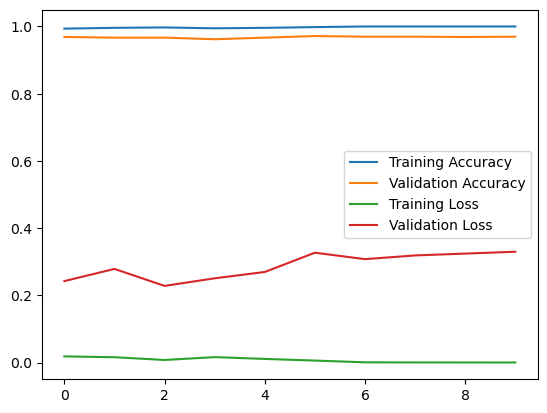

33/33 [==============================] - 0s 6ms/step


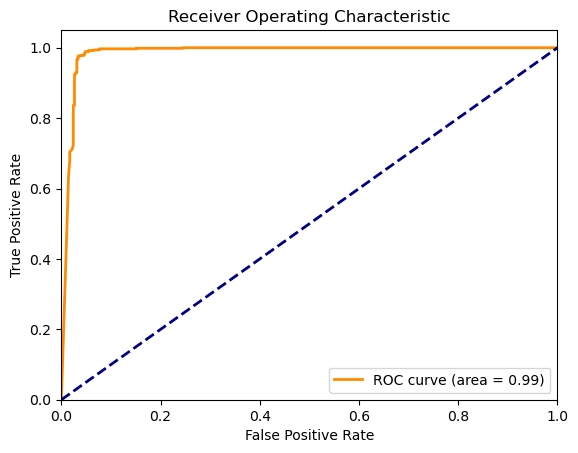

In [11]:
# Evaluate the model
loss, accuracy = model.evaluate(testX, testY)
print(f'Test accuracy: {accuracy:.2f}')
# Classification report
from sklearn.metrics import classification_report, roc_curve, auc
y_pred = model.predict(testX)
y_pred_class = np.argmax(y_pred, axis=1)
y_test_class = np.argmax(testY, axis=1)
print(classification_report(y_test_class, y_pred_class))
# Accuracy vs Loss curves
import matplotlib.pyplot as plt
history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()
# ROC curve
y_pred_proba = model.predict(testX)[:, 1]
fpr, tpr, _ = roc_curve(testY[:, 1], y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [12]:
#LENET
def lenet_model():
    model = Sequential()
    model.add(Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(16, (5, 5), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(120, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
# Example usage:
zip_file_path = r"C:\Users\91817\Downloads\archive (15).zip"
trainX, trainY, testX, testY = load_dataset(zip_file_path)
model = create_model()
model.summary()
model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY))
loss, accuracy = model.evaluate(testX, testY)
print(f'Test accuracy: {accuracy:.2f}')

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 576)              

33/33 [==============================] - 0s 6ms/step - loss: 0.2061 - accuracy: 0.9715
Test accuracy: 0.97
33/33 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       417
           1       0.96      0.99      0.98       637

    accuracy                           0.97      1054
   macro avg       0.97      0.97      0.97      1054
weighted avg       0.97      0.97      0.97      1054

Epoch 1/10
132/132 [==============================] - 2s 14ms/step - loss: 0.0061 - accuracy: 0.9979 - val_loss: 0.2172 - val_accuracy: 0.9763
Epoch 2/10
132/132 [==============================] - 2s 13ms/step - loss: 0.0079 - accuracy: 0.9967 - val_loss: 0.1899 - val_accuracy: 0.9677
Epoch 3/10
132/132 [==============================] - 2s 12ms/step - loss: 0.0236 - accuracy: 0.9926 - val_loss: 0.2605 - val_accuracy: 0.9658
Epoch 4/10
132/132 [==============================] - 2s 12ms/step - loss: 0.0118 - 

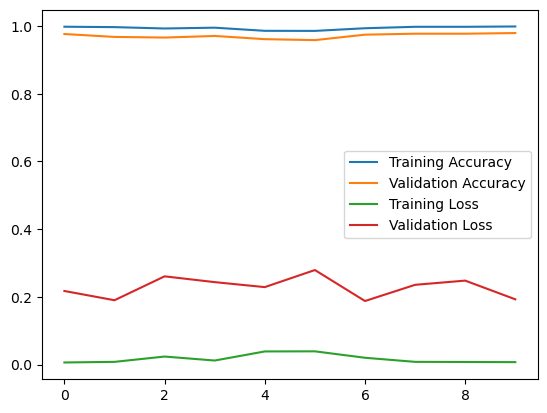

33/33 [==============================] - 0s 5ms/step


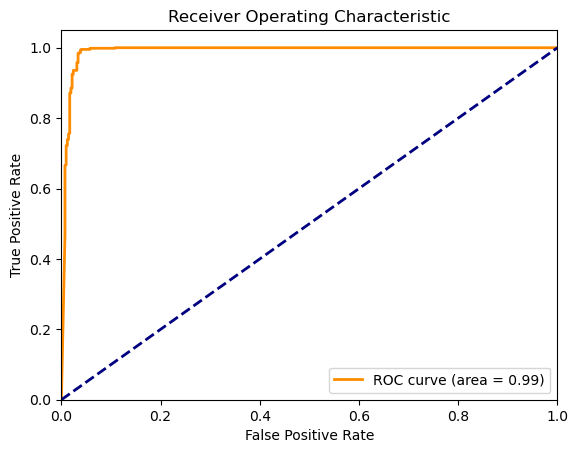

In [13]:
# Evaluate the model
loss, accuracy = model.evaluate(testX, testY)
print(f'Test accuracy: {accuracy:.2f}')
# Classification report
from sklearn.metrics import classification_report, roc_curve, auc
y_pred = model.predict(testX)
y_pred_class = np.argmax(y_pred, axis=1)
y_test_class = np.argmax(testY, axis=1)
print(classification_report(y_test_class, y_pred_class))
# Accuracy vs Loss curves
import matplotlib.pyplot as plt
history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()
# ROC curve
y_pred_proba = model.predict(testX)[:, 1]
fpr, tpr, _ = roc_curve(testY[:, 1], y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [16]:
# Train models
from tensorflow.keras.layers import GlobalAveragePooling2D
models = {
    'ResNet50': resnet50_model(),
    'VGG16': vgg16_model(),
    'MobileNet': mobilenet_model(),
    'LeNet': lenet_model(),
}


In [17]:
pip install tabulate

In [20]:
accuracy_dict = {}
for name, model in models.items():
    print(f'Training {name} model...')
    history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY))
    loss, accuracy = model.evaluate(testX, testY)
    accuracy_dict[name] = accuracy

Training ResNet50 model...
Epoch 1/10
132/132 [==============================] - 110s 693ms/step - loss: 0.4403 - accuracy: 0.8585 - val_loss: 0.5359 - val_accuracy: 0.7249
Epoch 2/10
132/132 [==============================] - 88s 664ms/step - loss: 0.1946 - accuracy: 0.9414 - val_loss: 0.4455 - val_accuracy: 0.8416
Epoch 3/10
132/132 [==============================] - 92s 696ms/step - loss: 0.1497 - accuracy: 0.9520 - val_loss: 0.1674 - val_accuracy: 0.9421
Epoch 4/10
132/132 [==============================] - 92s 699ms/step - loss: 0.1154 - accuracy: 0.9596 - val_loss: 0.2371 - val_accuracy: 0.9402
Epoch 5/10
132/132 [==============================] - 90s 679ms/step - loss: 0.1042 - accuracy: 0.9573 - val_loss: 0.1365 - val_accuracy: 0.9488
Epoch 6/10
132/132 [==============================] - 88s 668ms/step - loss: 0.1294 - accuracy: 0.9440 - val_loss: 0.1719 - val_accuracy: 0.9526
Epoch 7/10
132/132 [==============================] - 88s 669ms/step - loss: 0.0915 - accuracy: 0.9660

In [21]:
from tabulate import tabulate
table = [["Model", "Accuracy"]]
for name, accuracy in accuracy_dict.items():
    table.append([name, f"{accuracy*100:.2f}%"])
print(tabulate(table, headers="firstrow", tablefmt="fancy_grid"))


╒═══════════╤════════════╕
│ Model     │ Accuracy   │
╞═══════════╪════════════╡
│ ResNet50  │ 94.97%     │
├───────────┼────────────┤
│ VGG16     │ 96.68%     │
├───────────┼────────────┤
│ MobileNet │ 94.31%     │
├───────────┼────────────┤
│ LeNet     │ 96.20%     │
╘═══════════╧════════════╛


Epoch 1/20
106/106 [==============================] - 201s 1s/step - loss: 0.5089 - accuracy: 0.7979 - val_loss: 0.7536 - val_accuracy: 0.6358
Epoch 2/20
106/106 [==============================] - 131s 1s/step - loss: 0.5035 - accuracy: 0.7756 - val_loss: 0.9829 - val_accuracy: 0.6358
Epoch 3/20
106/106 [==============================] - 131s 1s/step - loss: 0.4931 - accuracy: 0.7792 - val_loss: 0.8019 - val_accuracy: 0.6358
Epoch 4/20
106/106 [==============================] - 132s 1s/step - loss: 0.4890 - accuracy: 0.8071 - val_loss: 0.6941 - val_accuracy: 0.6358
Epoch 5/20
106/106 [==============================] - 130s 1s/step - loss: 0.5556 - accuracy: 0.7599 - val_loss: 0.7061 - val_accuracy: 0.6382
Epoch 6/20
106/106 [==============================] - 129s 1s/step - loss: 0.5482 - accuracy: 0.7631 - val_loss: 0.6999 - val_accuracy: 0.6477
Epoch 7/20
106/106 [==============================] - 128s 1s/step - loss: 0.5340 - accuracy: 0.7717 - val_loss: 0.4629 - val_accuracy: 0.8339

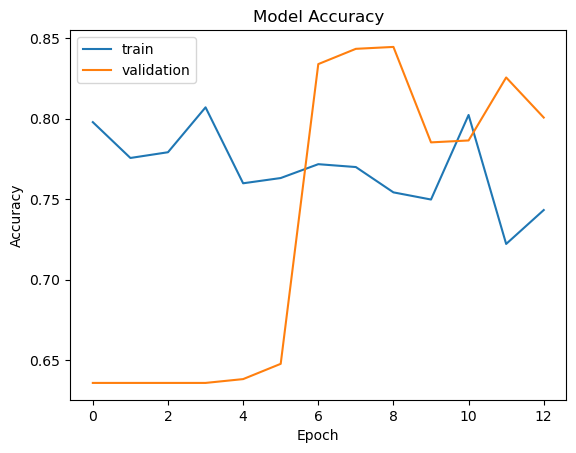

In [11]:
import os
import zipfile
import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, Concatenate
from tensorflow.keras.applications import ResNet50, VGG16, MobileNet
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.callbacks import EarlyStopping


def load_dataset(zip_file_path):
    # (The load_dataset function remains unchanged)
  # Extract ZIP file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall('dataset')
    
    # Load images and labels
    images_dir = 'dataset/Brain_Tumor_Dataset'
    images = []
    labels = []
    for dir_name in os.listdir(images_dir):
        dir_path = os.path.join(images_dir, dir_name)
        if os.path.isdir(dir_path):
            for file_name in os.listdir(dir_path):
                img_path = os.path.join(dir_path, file_name)
                img = load_img(img_path, color_mode='grayscale', target_size=(32, 32))
                img_array = img_to_array(img)
                images.append(img_array)
                if dir_name == 'Positive':
                    labels.append(1)
                else:
                    labels.append(0)

    # Convert to numpy arrays and reshape
    images = np.array(images).reshape((-1, 32, 32, 1))
    labels = np.array(labels)
    
    # One-hot encode labels
    labels = to_categorical(labels)
    
    # Split dataset into training and testing sets (e.g., 80% train, 20% test)
    trainX, testX, trainY, testY = train_test_split(images, labels, test_size=0.2, random_state=42)
    return trainX, trainY, testX, testY

def add_prefix_to_layers(model, prefix):
    for layer in model.layers:
        layer._name = prefix + '_' + layer.name
    return model

def ensemble_model(input_shape=(32, 32, 1)):
    # Model 1: ConvNet
    input_x = Input(shape=input_shape, name='convnet_input')
    x1 = Conv2D(32, (3, 3), activation='relu', name='convnet_conv1')(input_x)
    x1 = MaxPooling2D((2, 2), name='convnet_pool1')(x1)
    x1 = Conv2D(64, (3, 3), activation='relu', name='convnet_conv2')(x1)
    x1 = MaxPooling2D((2, 2), name='convnet_pool2')(x1)
    x1 = Flatten(name='convnet_flatten')(x1)
    x1 = Dense(64, activation='relu', name='convnet_dense1')(x1)
    x1 = Dense(2, activation='softmax', name='convnet_output')(x1)
    model1 = Model(inputs=input_x, outputs=x1)

    # Model 2: ResNet50
    base_model2 = ResNet50(weights=None, include_top=False, input_shape=input_shape)
    base_model2 = add_prefix_to_layers(base_model2, 'resnet50')
    x2 = base_model2.output
    x2 = GlobalAveragePooling2D(name='resnet50_gap')(x2)
    x2 = Dense(64, activation='relu', name='resnet50_dense1')(x2)
    x2 = Dense(2, activation='softmax', name='resnet50_output')(x2)
    model2 = Model(inputs=base_model2.input, outputs=x2)

    # Model 3: VGG16
    base_model3 = VGG16(weights=None, include_top=False, input_shape=input_shape)
    base_model3 = add_prefix_to_layers(base_model3, 'vgg16')
    x3 = base_model3.output
    x3 = GlobalAveragePooling2D(name='vgg16_gap')(x3)
    x3 = Dense(64, activation='relu', name='vgg16_dense1')(x3)
    x3 = Dense(2, activation='softmax', name='vgg16_output')(x3)
    model3 = Model(inputs=base_model3.input, outputs=x3)

    # Model 4: MobileNet
    base_model4 = MobileNet(weights=None, include_top=False, input_shape=input_shape)
    base_model4 = add_prefix_to_layers(base_model4, 'mobilenet')
    x4 = base_model4.output
    x4 = GlobalAveragePooling2D(name='mobilenet_gap')(x4)
    x4 = Dense(64, activation='relu', name='mobilenet_dense1')(x4)
    x4 = Dense(2, activation='softmax', name='mobilenet_output')(x4)
    model4 = Model(inputs=base_model4.input, outputs=x4)

    # Model 5: LeNet
    input_x5 = Input(shape=input_shape, name='lenet_input')
    x5 = Conv2D(6, (5, 5), activation='relu', name='lenet_conv1')(input_x5)
    x5 = MaxPooling2D((2, 2), name='lenet_pool1')(x5)
    x5 = Conv2D(16, (5, 5), activation='relu', name='lenet_conv2')(x5)
    x5 = MaxPooling2D((2, 2), name='lenet_pool2')(x5)
    x5 = Flatten(name='lenet_flatten')(x5)
    x5 = Dense(120, activation='relu', name='lenet_dense1')(x5)
    x5 = Dense(84, activation='relu', name='lenet_dense2')(x5)
    x5 = Dense(2, activation='softmax', name='lenet_output')(x5)
    model5 = Model(inputs=input_x5, outputs=x5)

    # Concatenate all models
    combined = Concatenate(name='combined')([model1.output, model2.output, model3.output, model4.output, model5.output])
    
    # Final output layer for ensemble model
    z = Dense(64, activation='relu', name='final_dense')(combined)
    z = Dense(2, activation='softmax', name='final_output')(z)

    # Complete ensemble model
    ensemble = Model(inputs=[model1.input, model2.input, model3.input, model4.input, model5.input], outputs=z)

    # Compile model
    ensemble.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return ensemble
# Load dataset
zip_file_path = r"C:\Users\91817\Downloads\archive (15).zip"
trainX, trainY, testX, testY = load_dataset(zip_file_path)

# Create ensemble model
model = ensemble_model(input_shape=(32, 32, 1))

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    [trainX] * 5,  # Input for each of the 5 models
    trainY,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate([testX] * 5, testY, verbose=0)

print(f"Test accuracy: {test_accuracy:.4f}")

# Plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='validation')
pyplot.title('Model Accuracy')
pyplot.xlabel('Epoch')
pyplot.ylabel('Accuracy')
pyplot.legend()
pyplot.show()

33/33 [==============================] - 6s 189ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.73      0.78       417
           1       0.84      0.90      0.87       637

    accuracy                           0.83      1054
   macro avg       0.83      0.82      0.82      1054
weighted avg       0.83      0.83      0.83      1054

Accuracy Score: 0.8330170777988615


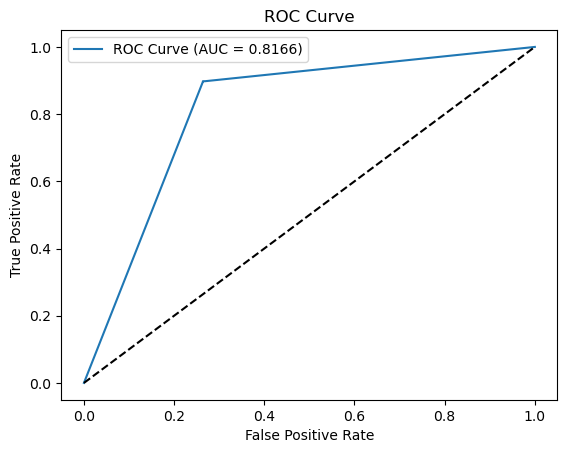

In [13]:

import numpy as np
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
from matplotlib import pyplot
# Predict on test set
y_pred = model.predict([testX] * 5)
y_pred_class = np.argmax(y_pred, axis=1)
y_test_class = np.argmax(testY, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_test_class, y_pred_class))

# Accuracy score
print("Accuracy Score:", accuracy_score(y_test_class, y_pred_class))

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test_class, y_pred[:, 1])
auc_value = auc(fpr, tpr)
pyplot.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_value:.4f})')
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
pyplot.legend()
pyplot.show()


In [2]:
#AUTO-ENCODER
import os
import zipfile
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
def load_dataset(zip_file_path):
    # Extract ZIP file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall('dataset')
    
    # Load images and labels
    images_dir = 'dataset/Brain_Tumor_Dataset'
    images = []
    labels = []
    
    for dir_name in os.listdir(images_dir):
        dir_path = os.path.join(images_dir, dir_name)
        if os.path.isdir(dir_path):
            for file_name in os.listdir(dir_path):
                img_path = os.path.join(dir_path, file_name)
                img = load_img(img_path, color_mode='grayscale', target_size=(28, 28))
                img_array = img_to_array(img)
                images.append(img_array)
                if dir_name == 'Positive':
                    labels.append(1)
                else:
                    labels.append(0)
    
    # Convert to numpy arrays and reshape
    images = np.array(images).reshape((-1, 28, 28, 1))
    labels = np.array(labels)
    # One-hot encode labels
    labels = to_categorical(labels)
    # Split dataset into training and testing sets (e.g., 80% train, 20% test)
    trainX, testX, trainY, testY = train_test_split(images, labels, test_size=0.2, random_state=42)
    return trainX, trainY, testX, testY
# Load the dataset
zip_file_path = r"C:\Users\91817\Downloads\archive (15).zip"
trainX, trainY, testX, testY = load_dataset(zip_file_path)
# Normalize the images
trainX = trainX.astype('float32') / 255.0
testX = testX.astype('float32') / 255.0
# Build the autoencoder
input_img = layers.Input(shape=(28, 28, 1))
# Encoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)
# Decoder
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
# Train the autoencoder
autoencoder.fit(trainX, trainX, epochs=50, batch_size=64, shuffle=True, validation_data=(testX, testX))
# Encoder model to get compressed features
encoder = models.Model(input_img, encoded)
# Get the encoded/compressed features
trainX_encoded = encoder.predict(trainX)
testX_encoded = encoder.predict(testX)
# Flatten the encoded features for DNN input
trainX_flat = trainX_encoded.reshape(trainX_encoded.shape[0], -1)
testX_flat = testX_encoded.reshape(testX_encoded.shape[0], -1)
# Build the DNN for classification
dnn = models.Sequential()
dnn.add(layers.Dense(128, activation='relu', input_shape=(trainX_flat.shape[1],)))
dnn.add(layers.Dropout(0.5))
dnn.add(layers.Dense(64, activation='relu'))
dnn.add(layers.Dropout(0.5))
dnn.add(layers.Dense(1, activation='sigmoid'))
dnn.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
# Train the DNN classifier
dnn.fit(trainX_flat, trainY[:, 1], epochs=10, batch_size=64, validation_data=(testX_flat, testY[:, 1]))
# Evaluate the model
loss, accuracy = dnn.evaluate(testX_flat, testY[:, 1])
print(f'Test Accuracy: {accuracy*100:.2f}%')





Epoch 1/50

66/66 [==============================] - 7s 68ms/step - loss: 0.4529 - val_loss: 0.3762
Epoch 2/50
66/66 [==============================] - 4s 62ms/step - loss: 0.3722 - val_loss: 0.3684
Epoch 3/50
66/66 [==============================] - 4s 60ms/step - loss: 0.3671 - val_loss: 0.3648
Epoch 4/50
66/66 [==============================] - 4s 60ms/step - loss: 0.3639 - val_loss: 0.3620
Epoch 5/50
66/66 [==============================] - 4s 60ms/step - loss: 0.3617 - val_loss: 0.3604
Epoch 6/50
66/66 [==============================] - 4s 59ms/step - loss: 0.3600 - val_loss: 0.3587
Epoch 7/50
66/66 [==============================] - 4s 58ms/step - loss: 0.3586 - val_loss: 0.3574
Epoch 8/50
66/66 [==============================] - 4s 60ms/step - loss: 0.3573 - val_loss: 0.3561
Epoch 9/50
66/66 [==============================] - 4s 59ms/step - loss: 0.3563 - val_loss: 0.3558
Epoch 10/50
66/66 [==============================] - 4s 59ms/step - loss: 0.3552 - val_loss: 0.3542
Epoch

In [3]:
#SPARSE-AUTO ENCODER
import os
import zipfile
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
# Function to load and preprocess dataset from ZIP file
def load_dataset(zip_file_path):
    # Extract ZIP file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall('dataset')
    # Load images and labels
    images_dir = 'dataset/Brain_Tumor_Dataset'
    images = []
    labels = []
    for dir_name in os.listdir(images_dir):
        dir_path = os.path.join(images_dir, dir_name)
        if os.path.isdir(dir_path):
            for file_name in os.listdir(dir_path):
                img_path = os.path.join(dir_path, file_name)
                img = load_img(img_path, color_mode='grayscale', target_size=(28, 28))
                img_array = img_to_array(img)
                images.append(img_array)
                if dir_name == 'Positive':
                    labels.append(1)
                else:
                    labels.append(0)
    # Convert to numpy arrays and reshape
    images = np.array(images).reshape((-1, 28, 28, 1))
    labels = np.array(labels)
    # One-hot encode labels
    labels = to_categorical(labels)
    # Split dataset into training and testing sets (e.g., 80% train, 20% test)
    trainX, testX, trainY, testY = train_test_split(images, labels, test_size=0.2, random_state=42)
    return trainX, trainY, testX, testY
# Load the dataset
zip_file_path = r"C:\Users\91817\Downloads\archive (15).zip"
trainX, trainY, testX, testY = load_dataset(zip_file_path)
# Normalize the images
trainX = trainX.astype('float32') / 255.0
testX = testX.astype('float32') / 255.0
# Build the sparse autoencoder
input_img = layers.Input(shape=(28, 28, 1))
# Encoder with sparsity regularizer
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                  activity_regularizer=regularizers.l1(10e-5))(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                  activity_regularizer=regularizers.l1(10e-5))(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)
# Decoder
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
# Train the sparse autoencoder
autoencoder.fit(trainX, trainX, epochs=50, batch_size=64, shuffle=True, validation_data=(testX, testX))
# Encoder model to get compressed features
encoder = models.Model(input_img, encoded)
# Get the encoded/compressed features
trainX_encoded = encoder.predict(trainX)
testX_encoded = encoder.predict(testX)
# Flatten the encoded features for DNN input
trainX_flat = trainX_encoded.reshape(trainX_encoded.shape[0], -1)
testX_flat = testX_encoded.reshape(testX_encoded.shape[0], -1)
# Build the DNN for classification
dnn = models.Sequential()
dnn.add(layers.Dense(128, activation='relu', input_shape=(trainX_flat.shape[1],)))
dnn.add(layers.Dropout(0.5))
dnn.add(layers.Dense(64, activation='relu'))
dnn.add(layers.Dropout(0.5))
dnn.add(layers.Dense(1, activation='sigmoid'))
dnn.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
# Train the DNN classifier
dnn.fit(trainX_flat, trainY[:, 1], epochs=50, batch_size=64, validation_data=(testX_flat, testY[:, 1]))
# Evaluate the model
loss, accuracy = dnn.evaluate(testX_flat, testY[:, 1])
print(f'Test Accuracy: {accuracy*100:.2f}%')


Epoch 1/50
66/66 [==============================] - 7s 73ms/step - loss: 0.4934 - val_loss: 0.3976
Epoch 2/50
66/66 [==============================] - 4s 64ms/step - loss: 0.3870 - val_loss: 0.3788
Epoch 3/50
66/66 [==============================] - 4s 64ms/step - loss: 0.3763 - val_loss: 0.3733
Epoch 4/50
66/66 [==============================] - 4s 63ms/step - loss: 0.3723 - val_loss: 0.3703
Epoch 5/50
66/66 [==============================] - 4s 61ms/step - loss: 0.3699 - val_loss: 0.3682
Epoch 6/50
66/66 [==============================] - 4s 61ms/step - loss: 0.3679 - val_loss: 0.3665
Epoch 7/50
66/66 [==============================] - 4s 62ms/step - loss: 0.3665 - val_loss: 0.3653
Epoch 8/50
66/66 [==============================] - 4s 61ms/step - loss: 0.3654 - val_loss: 0.3642
Epoch 9/50
66/66 [==============================] - 4s 62ms/step - loss: 0.3644 - val_loss: 0.3638
Epoch 10/50
66/66 [==============================] - 4s 62ms/step - loss: 0.3636 - val_loss: 0.3627
Epoch 11/

In [4]:
#DENOISING AUTOENCODER
import os
import zipfile
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
# Function to load and preprocess dataset from ZIP file
def load_dataset(zip_file_path):
    # Extract ZIP file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall('dataset')
    
    # Load images and labels
    images_dir = 'dataset/Brain_Tumor_Dataset'
    images = []
    labels = []
    
    for dir_name in os.listdir(images_dir):
        dir_path = os.path.join(images_dir, dir_name)
        if os.path.isdir(dir_path):
            for file_name in os.listdir(dir_path):
                img_path = os.path.join(dir_path, file_name)
                img = load_img(img_path, color_mode='grayscale', target_size=(28, 28))
                img_array = img_to_array(img)
                images.append(img_array)
                if dir_name == 'Positive':
                    labels.append(1)
                else:
                    labels.append(0)
    # Convert to numpy arrays and reshape
    images = np.array(images).reshape((-1, 28, 28, 1))
    labels = np.array(labels)
    # One-hot encode labels
    labels = to_categorical(labels)
    # Split dataset into training and testing sets (e.g., 80% train, 20% test)
    trainX, testX, trainY, testY = train_test_split(images, labels, test_size=0.2, random_state=42)
    return trainX, trainY, testX, testY
# Load the dataset
zip_file_path = r"C:\Users\91817\Downloads\archive (15).zip"
trainX, trainY, testX, testY = load_dataset(zip_file_path)
# Normalize the images
trainX = trainX.astype('float32') / 255.0
testX = testX.astype('float32') / 255.0
# Introduce noise to the input data
def add_noise(data, noise_factor=0.2):
    noise = noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data.shape)
    noisy_data = data + noise
    noisy_data = np.clip(noisy_data, 0., 1.)
    return noisy_data
trainX_noisy = add_noise(trainX)
testX_noisy = add_noise(testX)
# Build the denoising autoencoder
input_img = layers.Input(shape=(28, 28, 1))
# Encoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)
# Decoder
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
# Train the denoising autoencoder
autoencoder.fit(trainX_noisy, trainX, epochs=50, batch_size=64, shuffle=True, validation_data=(testX_noisy, testX))
# Encoder model to get compressed features
encoder = models.Model(input_img, encoded)
# Get the encoded/compressed features
trainX_encoded = encoder.predict(trainX)
testX_encoded = encoder.predict(testX)
# Flatten the encoded features for DNN input
trainX_flat = trainX_encoded.reshape(trainX_encoded.shape[0], -1)
testX_flat = testX_encoded.reshape(testX_encoded.shape[0], -1)
# Build the DNN for classification
dnn = models.Sequential()
dnn.add(layers.Dense(128, activation='relu', input_shape=(trainX_flat.shape[1],)))
dnn.add(layers.Dropout(0.5))
dnn.add(layers.Dense(64, activation='relu'))
dnn.add(layers.Dropout(0.5))
dnn.add(layers.Dense(1, activation='sigmoid'))
dnn.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
# Train the DNN classifier
dnn.fit(trainX_flat, trainY[:, 1], epochs=50, batch_size=64, validation_data=(testX_flat, testY[:, 1]))
# Evaluate the model
loss, accuracy = dnn.evaluate(testX_flat, testY[:, 1])
print(f'Test Accuracy: {accuracy*100:.2f}%')


Epoch 1/50
66/66 [==============================] - 7s 65ms/step - loss: 0.4669 - val_loss: 0.3819
Epoch 2/50
66/66 [==============================] - 4s 59ms/step - loss: 0.3789 - val_loss: 0.3755
Epoch 3/50
66/66 [==============================] - 4s 56ms/step - loss: 0.3743 - val_loss: 0.3735
Epoch 4/50
66/66 [==============================] - 4s 55ms/step - loss: 0.3721 - val_loss: 0.3700
Epoch 5/50
66/66 [==============================] - 4s 60ms/step - loss: 0.3701 - val_loss: 0.3686
Epoch 6/50
66/66 [==============================] - 4s 60ms/step - loss: 0.3691 - val_loss: 0.3676
Epoch 7/50
66/66 [==============================] - 4s 61ms/step - loss: 0.3682 - val_loss: 0.3667
Epoch 8/50
66/66 [==============================] - 4s 59ms/step - loss: 0.3673 - val_loss: 0.3662
Epoch 9/50
66/66 [==============================] - 4s 57ms/step - loss: 0.3666 - val_loss: 0.3657
Epoch 10/50
66/66 [==============================] - 4s 59ms/step - loss: 0.3661 - val_loss: 0.3647
Epoch 11/

In [5]:
#DNN MODEL
import os
import zipfile
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
import numpy as np
# Function to load dataset from ZIP file and prepare it
def load_dataset(zip_file_path):
    # Extract ZIP file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall('dataset')
     # Load images and labels
    images_dir = 'dataset/Brain_Tumor_Dataset'
    images = []
    labels = []
    for dir_name in os.listdir(images_dir):
        dir_path = os.path.join(images_dir, dir_name)
        if os.path.isdir(dir_path):
            for file_name in os.listdir(dir_path):
                img_path = os.path.join(dir_path, file_name)
                img = load_img(img_path, color_mode='grayscale', target_size=(28, 28))
                img_array = img_to_array(img)
                images.append(img_array)
                
                # Assign labels: Positive (1), Negative (0)
                if dir_name == 'Positive':
                    labels.append(1)
                else:
                    labels.append(0)
    # Convert to numpy arrays and reshape
    images = np.array(images).reshape((-1, 28, 28, 1))  # Reshaped for DNN input
    labels = np.array(labels)
    # One-hot encode labels for binary classification
    labels = to_categorical(labels)
    # Split dataset into training and testing sets (e.g., 80% train, 20% test)
    trainX, testX, trainY, testY = train_test_split(images, labels, test_size=0.2, random_state=42)
    return trainX, trainY, testX, testY
# Define DNN model
def create_dnn_model():
    model = Sequential()
# Flatten the input (for 28x28 grayscale images)
    model.add(Flatten(input_shape=(28, 28, 1)))
# Add multiple Dense layers with ReLU activation
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))  # Dropout to prevent overfitting
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
# Output layer for binary classification (tumor/no tumor)
    model.add(Dense(2, activation='softmax'))
# Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model
# Example usage:
zip_file_path = r"C:\Users\91817\Downloads\archive (15).zip"
trainX, trainY, testX, testY = load_dataset(zip_file_path)
# Create the DNN model
model = create_dnn_model()
# Train the model
history = model.fit(trainX, trainY, epochs=10, validation_data=(testX, testY), batch_size=32)
# Evaluate the model
evaluation = model.evaluate(testX, testY)
print(f"Test Accuracy: {evaluation[1]*100:.2f}%")


Epoch 1/10
132/132 [==============================] - 4s 14ms/step - loss: 17.1176 - accuracy: 0.5311 - val_loss: 1.1817 - val_accuracy: 0.5911
Epoch 2/10
132/132 [==============================] - 1s 11ms/step - loss: 2.8973 - accuracy: 0.5389 - val_loss: 0.7230 - val_accuracy: 0.6414
Epoch 3/10
132/132 [==============================] - 1s 11ms/step - loss: 0.8477 - accuracy: 0.6339 - val_loss: 0.6480 - val_accuracy: 0.6243
Epoch 4/10
132/132 [==============================] - 2s 12ms/step - loss: 0.6908 - accuracy: 0.6652 - val_loss: 0.6486 - val_accuracy: 0.6233
Epoch 5/10
132/132 [==============================] - 2s 12ms/step - loss: 0.6360 - accuracy: 0.6987 - val_loss: 0.5795 - val_accuracy: 0.7030
Epoch 6/10
132/132 [==============================] - 1s 11ms/step - loss: 0.6270 - accuracy: 0.7025 - val_loss: 0.6339 - val_accuracy: 0.6414
Epoch 7/10
132/132 [==============================] - 1s 11ms/step - loss: 0.6108 - accuracy: 0.7108 - val_loss: 0.6020 - val_accuracy: 0.653

In [10]:
#combination of 3 modes
import os
import zipfile
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, Concatenate
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3
# Function to load dataset from ZIP file and prepare it
def load_dataset(zip_file_path):
    # Extract ZIP file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall('dataset')
# Load images and labels
    images_dir = 'dataset/Brain_Tumor_Dataset'
    images = []
    labels = []
    for dir_name in os.listdir(images_dir):
        dir_path = os.path.join(images_dir, dir_name)
        if os.path.isdir(dir_path):
            for file_name in os.listdir(dir_path):
                img_path = os.path.join(dir_path, file_name)
                # Load images in RGB format
                img = load_img(img_path, color_mode='rgb', target_size=(224, 224))  # 224x224 for pre-trained models
                img_array = img_to_array(img)
                images.append(img_array)
                # Assign labels: Positive (1), Negative (0)
                if dir_name == 'Positive':
                    labels.append(1)
                else:
                    labels.append(0)
# Convert to numpy arrays
    images = np.array(images)
    labels = np.array(labels)
# One-hot encode labels for binary classification
    labels = to_categorical(labels)
# Split dataset into training and testing sets (e.g., 80% train, 20% test)
    trainX, testX, trainY, testY = train_test_split(images, labels, test_size=0.2, random_state=42)
    return trainX, trainY, testX, testY
# Define the combined model
def create_combined_model():
    # Input layer
    input_shape = (224, 224, 3)  # For RGB images
# Create separate inputs for each model
    input_vgg = Input(shape=input_shape)
    input_resnet = Input(shape=input_shape)
    input_inception = Input(shape=input_shape)
# VGG16 model
    vgg = VGG16(weights='imagenet', include_top=False, input_tensor=input_vgg)
    vgg.trainable = False  # Freeze layers
 # ResNet50 model
    resnet = ResNet50(weights='imagenet', include_top=False, input_tensor=input_resnet)
    resnet.trainable = False  # Freeze layers
# InceptionV3 model
    inception = InceptionV3(weights='imagenet', include_top=False, input_tensor=input_inception)
    inception.trainable = False  # Freeze layers
# Combined feature extraction
    vgg_output = vgg(input_vgg)
    resnet_output = resnet(input_resnet)
    inception_output = inception(input_inception)
# Concatenate the outputs
    combined = Concatenate()([Flatten()(vgg_output), Flatten()(resnet_output), Flatten()(inception_output)])
# DNN layers
    combined = Dense(512, activation='relu')(combined)
    combined = Dropout(0.5)(combined)
    combined = Dense(256, activation='relu')(combined)
    combined = Dropout(0.5)(combined)
    combined = Dense(128, activation='relu')(combined)
# Output layer for binary classification (tumor/no tumor)
    output = Dense(2, activation='softmax')(combined)
# Create model
    model = Model(inputs=[input_vgg, input_resnet, input_inception], outputs=output)
# Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
# Example usage:
zip_file_path = r"C:\Users\91817\Downloads\archive (15).zip"
trainX, trainY, testX, testY = load_dataset(zip_file_path)
# Create the combined model
model = create_combined_model()
# Prepare input for the model (each model requires a separate input)
trainX_combined = [trainX, trainX, trainX]  # Same input for all three models
testX_combined = [testX, testX, testX]      # Same input for all three models
# Train the model
history = model.fit(trainX_combined, trainY, epochs=10, validation_data=(testX_combined, testY), batch_size=32)
# Evaluate the model
evaluation = model.evaluate(testX_combined, testY)
print(f"Test Accuracy: {evaluation[1]*100:.2f}%")
# Save the model
model.save('combined_brain_tumor_detection_model.h5')


Epoch 1/10
132/132 [==============================] - 1080s 8s/step - loss: 53.0998 - accuracy: 0.8450 - val_loss: 3.8933 - val_accuracy: 0.9611
Epoch 2/10
132/132 [==============================] - 1036s 8s/step - loss: 8.6291 - accuracy: 0.9359 - val_loss: 2.8219 - val_accuracy: 0.9677
Epoch 3/10
132/132 [==============================] - 1042s 8s/step - loss: 2.7877 - accuracy: 0.9542 - val_loss: 0.7307 - val_accuracy: 0.9763
Epoch 4/10
132/132 [==============================] - 1016s 8s/step - loss: 1.6617 - accuracy: 0.9627 - val_loss: 0.7973 - val_accuracy: 0.9658
Epoch 5/10
132/132 [==============================] - 1022s 8s/step - loss: 0.6786 - accuracy: 0.9653 - val_loss: 0.2995 - val_accuracy: 0.9734
Epoch 6/10
132/132 [==============================] - 1003s 8s/step - loss: 0.3805 - accuracy: 0.9687 - val_loss: 0.1092 - val_accuracy: 0.9858
Epoch 7/10
132/132 [==============================] - 953s 7s/step - loss: 0.3294 - accuracy: 0.9675 - val_loss: 0.1372 - val_accuracy:

In [3]:
import os
import zipfile
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model  # Added Sequential import
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D  # Added GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3

# Function to load dataset from ZIP file and prepare it
def load_dataset(zip_file_path):
    # Extract ZIP file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall('dataset')
    # Load images and labels
    images_dir = 'dataset/Brain_Tumor_Dataset'
    images = []
    labels = []
    for dir_name in os.listdir(images_dir):
        dir_path = os.path.join(images_dir, dir_name)
        if os.path.isdir(dir_path):
            for file_name in os.listdir(dir_path):
                img_path = os.path.join(dir_path, file_name)
                img = load_img(img_path, color_mode='rgb', target_size=(224, 224))  # Change size to 224 for pre-trained models
                img_array = img_to_array(img)
                images.append(img_array)
                
                # Assign labels: Positive (1), Negative (0)
                if dir_name == 'Positive':
                    labels.append(1)
                else:
                    labels.append(0)
    # Convert to numpy arrays and reshape
    images = np.array(images)
    labels = np.array(labels)
    # One-hot encode labels for binary classification
    labels = to_categorical(labels)
    # Split dataset into training and testing sets (e.g., 80% train, 20% test)
    trainX, testX, trainY, testY = train_test_split(images, labels, test_size=0.2, random_state=42)
    return trainX, trainY, testX, testY

# Define the model to extract features from a specific layer
def create_feature_extractor(model_name, layer_name):
    if model_name == 'vgg16':
        base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    elif model_name == 'resnet50':
        base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    elif model_name == 'inceptionv3':
        base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    else:
        raise ValueError("Model name not recognized.")
    
    # Get the specified layer's output
    layer = base_model.get_layer(layer_name).output
    
    # Apply global average pooling to ensure consistent feature size
    pooled_output = GlobalAveragePooling2D()(layer)
    
    # Create a new model
    model = Model(inputs=base_model.input, outputs=pooled_output)
    return model

# Example usage
zip_file_path = r"C:\Users\91817\Downloads\archive (15).zip"
trainX, trainY, testX, testY = load_dataset(zip_file_path)

# Create feature extractors for each model
vgg_feature_extractor = create_feature_extractor('vgg16', 'block5_conv3')  # Adjust to your layer of choice
resnet_feature_extractor = create_feature_extractor('resnet50', 'conv4_block6_out')  # Adjust to your layer of choice
inception_feature_extractor = create_feature_extractor('inceptionv3', 'mixed10')  # Adjust to your layer of choice

# Extract features
train_features_vgg = vgg_feature_extractor.predict(trainX)
test_features_vgg = vgg_feature_extractor.predict(testX)
train_features_resnet = resnet_feature_extractor.predict(trainX)
test_features_resnet = resnet_feature_extractor.predict(testX)
train_features_inception = inception_feature_extractor.predict(trainX)
test_features_inception = inception_feature_extractor.predict(testX)

# Now the feature dimensions will match, so you can concatenate them
train_features_combined = np.concatenate([train_features_vgg, train_features_resnet, train_features_inception], axis=1)
test_features_combined = np.concatenate([test_features_vgg, test_features_resnet, test_features_inception], axis=1)

# Flatten combined features for DNN
train_features_flat = train_features_combined.reshape(train_features_combined.shape[0], -1)
test_features_flat = test_features_combined.reshape(test_features_combined.shape[0], -1)

# Create and train a DNN model using the extracted features
dnn_model = Sequential()
dnn_model.add(Dense(512, activation='relu', input_shape=(train_features_flat.shape[1],)))
dnn_model.add(Dropout(0.5))
dnn_model.add(Dense(256, activation='relu'))
dnn_model.add(Dropout(0.5))
dnn_model.add(Dense(128, activation='relu'))
dnn_model.add(Dense(2, activation='softmax'))  # Output layer for binary classification

# Compile the model
dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the DNN model
history = dnn_model.fit(train_features_flat, trainY, epochs=10, validation_data=(test_features_flat, testY), batch_size=32)

# Evaluate the model
evaluation = dnn_model.evaluate(test_features_flat, testY)
print(f"Test Accuracy: {evaluation[1]*100:.2f}%")


33/33 [==============================] - 25s 744ms/step

Epoch 1/10


132/132 [==============================] - 6s 27ms/step - loss: 3.2670 - accuracy: 0.7258 - val_loss: 0.1933 - val_accuracy: 0.9279
Epoch 2/10
132/132 [==============================] - 3s 23ms/step - loss: 0.3386 - accuracy: 0.8884 - val_loss: 0.1699 - val_accuracy: 0.9374
Epoch 3/10
132/132 [==============================] - 3s 22ms/step - loss: 0.2290 - accuracy: 0.9062 - val_loss: 0.1232 - val_accuracy: 0.9630
Epoch 4/10
132/132 [==============================] - 3s 22ms/step - loss: 0.2040 - accuracy: 0.9155 - val_loss: 0.1181 - val_accuracy: 0.9554
Epoch 5/10
132/132 [==============================] - 3s 22ms/step - loss: 0.1972 - accuracy: 0.9295 - val_loss: 0.1525 - val_accuracy: 0.9412
Epoch 6/10
132/132 [==============================] - 3s 22ms/step - loss: 0.2225 - accuracy: 0.9124 - val_loss: 0.1220 - val_accuracy: 0.9592
Epoch 7/10
132/132 [==============================] - 3s 22ms/step - loss: 0.1998 -